In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset into python 

In [2]:
data=pd.read_excel(r'C:\Users\DELL\Downloads\iris (3).xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.value_counts('Classification')

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# checking for missing values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

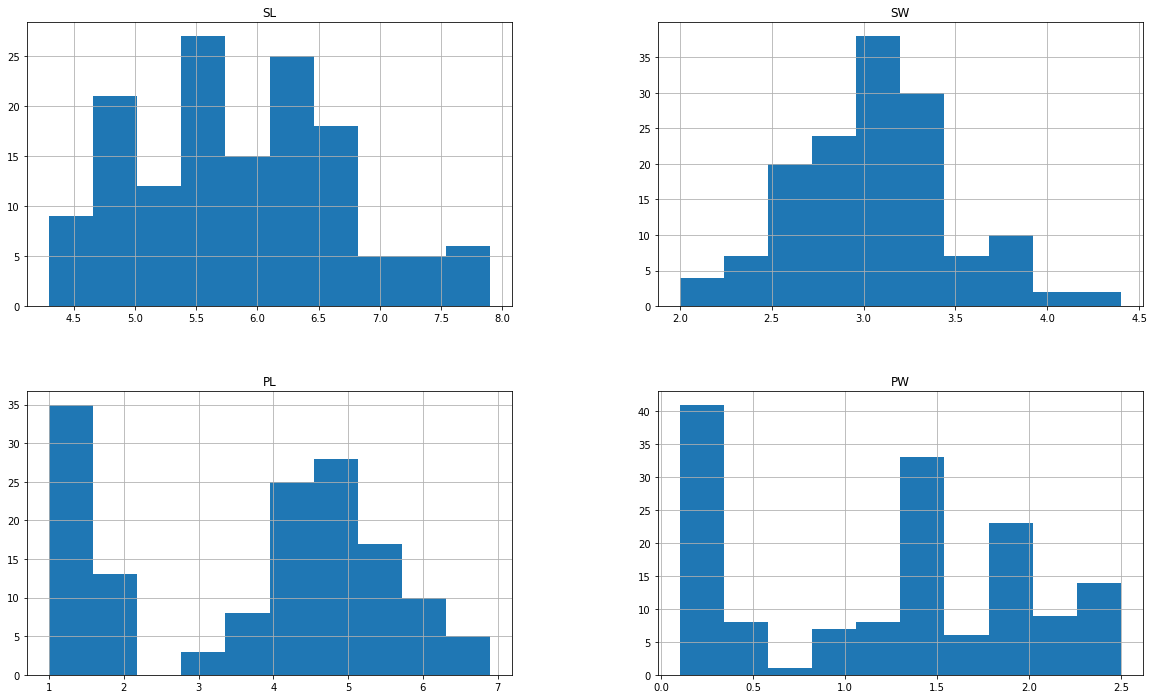

In [7]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,12))
plt.show()

# filling the missing values

In [8]:
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.780000,1.198667
std,0.808480,0.421884,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


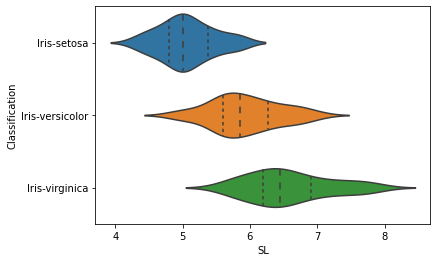

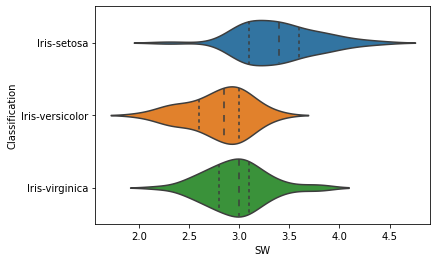

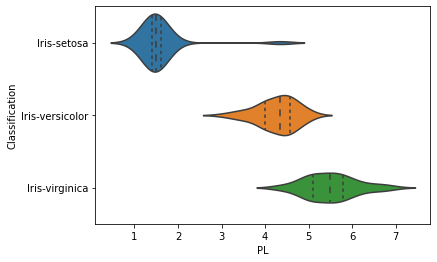

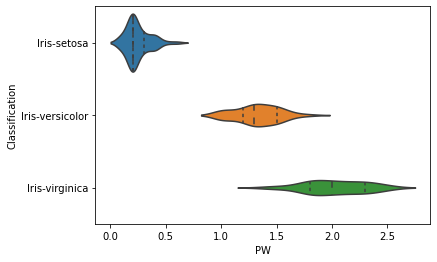

In [11]:
g = sns.violinplot(y='Classification', x='SL', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='SW', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='PL', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Classification', x='PW', data=data, inner='quartile')
plt.show()

# finding the outliers

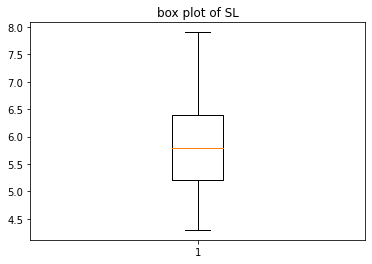

In [12]:
plt.boxplot(data['SL'])
plt.title('box plot of SL')
plt.show()

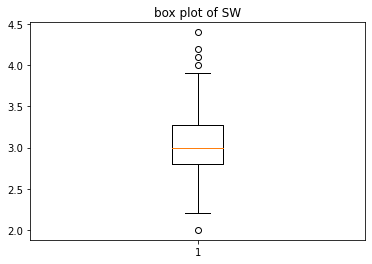

In [13]:
plt.boxplot(data['SW'])
plt.title('box plot of SW')
plt.show()

In [14]:
Q1=np.percentile(data['SW'],25, interpolation='midpoint')
Q2=np.percentile(data['SW'],50, interpolation='midpoint')
Q3=np.percentile(data['SW'],75, interpolation='midpoint')

In [15]:
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1

2.8
3.0
3.25


In [16]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [17]:
outlier=[]
for i in data['SW']:
    if((i>up_lim) or (i<low_lim)):
        outlier.append(i)
print(outlier)        

[4.0, 4.4, 4.1, 4.2, 2.0]


In [18]:
ind1=data['SW']>up_lim
c=data.loc[ind1].index
data.drop(c,inplace=True)
ind2=data['SW']<low_lim
d=data.loc[ind2].index
data.drop(d,inplace=True)

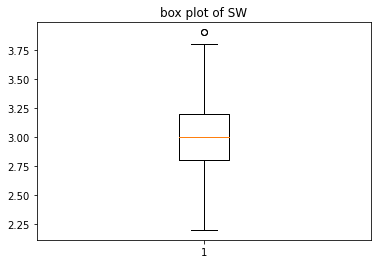

In [19]:
plt.boxplot(data['SW'])
plt.title('box plot of SW')
plt.show()

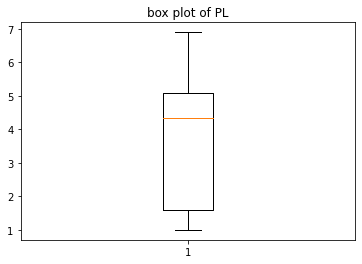

In [20]:
plt.boxplot(data['PL'])
plt.title('box plot of PL')
plt.show()

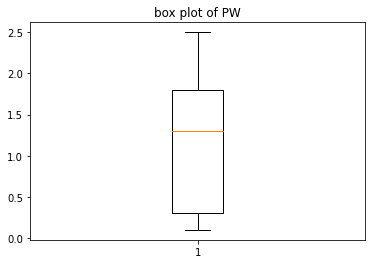

In [21]:
plt.boxplot(data['PW'])
plt.title('box plot of PW')
plt.show()

# label encoding

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Classification']= label_encoder.fit_transform(data['Classification'])

In [23]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.855944,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,4.35,2.0,2
148,6.200000,3.4,5.40,2.3,2


# model training

In [24]:
y=data['Classification']

In [25]:
X=data.drop(['Classification'],axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.20)

In [27]:
X_train.shape

(116, 4)

In [28]:
X_test.shape

(29, 4)

In [29]:
y_train.shape

(116,)

In [30]:
y_test.shape

(29,)

# logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import sklearn
sklearn.metrics.precision_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn')
y_test.value_counts()

2    11
0     9
1     9
Name: Classification, dtype: int64

In [33]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [34]:
print('accuracy is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 0.9310344827586207
precision is: 0.9310344827586207
recall is: 0.9310344827586207
f1 is: 0.9310344827586207


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knc_model=KNeighborsClassifier()
knc_model.fit(X_train,y_train)
y_pred1=knc_model.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred1)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [37]:
print('accuracy is:', accuracy_score(y_test,y_pred1))
print('precision is:', precision_score(y_test,y_pred1,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred1,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred1,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 0.9310344827586207
precision is: 0.9310344827586207
recall is: 0.9310344827586207
f1 is: 0.9310344827586207


# decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
y_pred2=dtc_model.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred2)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [40]:
print('accuracy is:', accuracy_score(y_test,y_pred2))
print('precision is:', precision_score(y_test,y_pred2,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred2,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred2,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 0.896551724137931
precision is: 0.9
recall is: 0.896551724137931
f1 is: 0.8968109929997409


# SVC

In [41]:
from sklearn.svm import SVC
svc_model=SVC(kernel='linear')
svc_model.fit(X_train,y_train)
y_pred3=svc_model.predict(X_test)

In [42]:
confusion_matrix(y_test,y_pred3)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [43]:
print('accuracy is:', accuracy_score(y_test,y_pred3))
print('precision is:', precision_score(y_test,y_pred3,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred3,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred3,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 0.896551724137931
precision is: 0.9
recall is: 0.896551724137931
f1 is: 0.8968109929997409


# random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()  
rf.fit(X_train, y_train)  
y_pred4=rf.predict(X_test)

In [45]:
confusion_matrix(y_test,y_pred4)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [46]:
print('accuracy is:', accuracy_score(y_test,y_pred4))
print('precision is:', precision_score(y_test,y_pred4,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred4,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred4,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 0.896551724137931
precision is: 0.9
recall is: 0.896551724137931
f1 is: 0.8968109929997409
